[*********************100%***********************]  1 of 1 completed


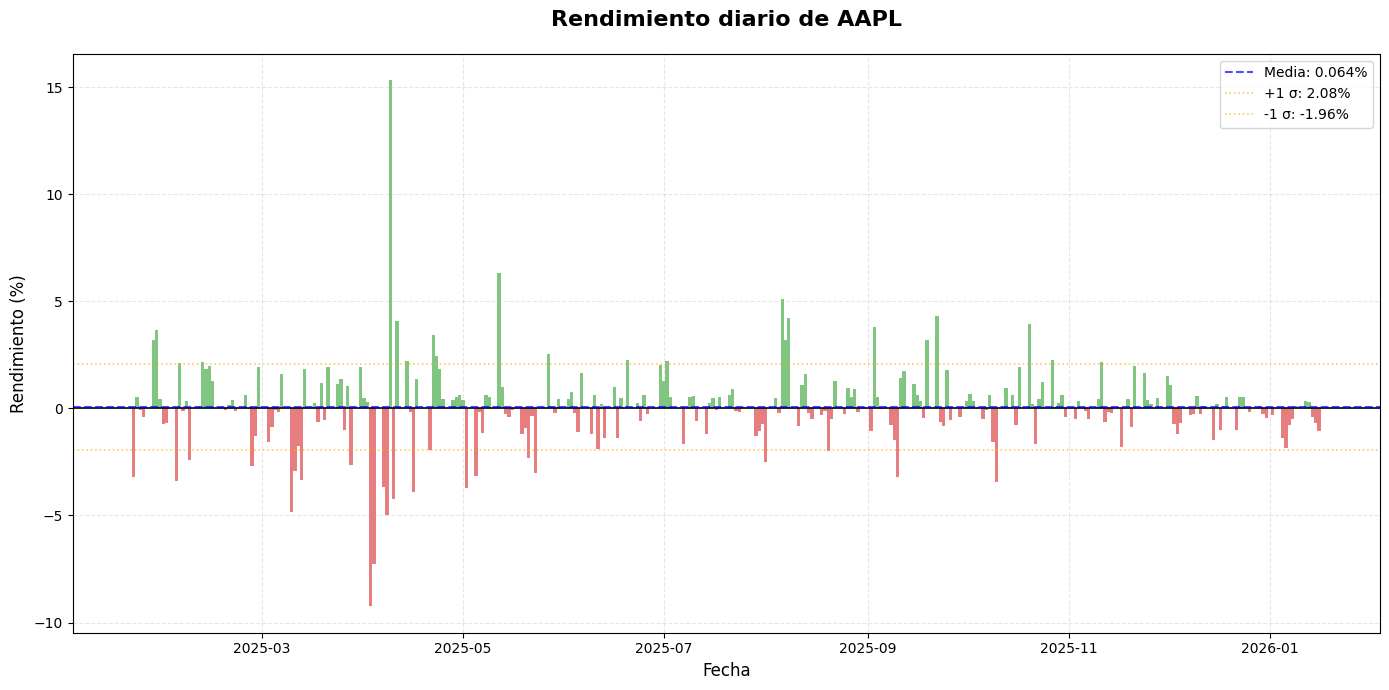


Estadísticas de rendimiento de AAPL:
Media: 0.064%
Desviación estándar: 2.02%
Máximo: 15.33%
Mínimo: -9.25%


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Obtener datos históricos de una acción
ticker = 'AAPL'
periodo = '1y'
df = yf.download(ticker, period=periodo)

# Calcular rendimientos diarios
df['Rendimiento'] = df['Close'].pct_change() * 100

# Calcular estadísticas
rendimiento_medio = df['Rendimiento'].mean()
desviacion_std = df['Rendimiento'].std()

# Crear gráfico mejorado
plt.figure(figsize=(14, 7))

# Gráfico de línea con colores según positivo/negativo
colors = ['#2ca02c' if x > 0 else '#d62728' for x in df['Rendimiento']]
plt.bar(df.index, df['Rendimiento'], color=colors, alpha=0.6, width=1)

# Líneas de referencia
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.2)
plt.axhline(y=rendimiento_medio, color='blue', linestyle='--', 
            linewidth=1.5, label=f'Media: {rendimiento_medio:.3f}%', alpha=0.7)
plt.axhline(y=rendimiento_medio + desviacion_std, color='orange', linestyle=':', 
            linewidth=1.2, label=f'+1 σ: {rendimiento_medio + desviacion_std:.2f}%', alpha=0.6)
plt.axhline(y=rendimiento_medio - desviacion_std, color='orange', linestyle=':', 
            linewidth=1.2, label=f'-1 σ: {rendimiento_medio - desviacion_std:.2f}%', alpha=0.6)

# Títulos y etiquetas
plt.title(f'Rendimiento diario de {ticker}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Rendimiento (%)', fontsize=12)

# Grid y leyenda
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', fontsize=10)

# Ajustar márgenes
plt.tight_layout()

plt.show()

# Mostrar estadísticas básicas
print(f"\nEstadísticas de rendimiento de {ticker}:")
print(f"Media: {rendimiento_medio:.3f}%")
print(f"Desviación estándar: {desviacion_std:.2f}%")
print(f"Máximo: {df['Rendimiento'].max():.2f}%")
print(f"Mínimo: {df['Rendimiento'].min():.2f}%")

In [2]:
import yfinance as yf
import pandas as pd

df = yf.download("AAPL", period="1y")

df["ret"] = df["Adj Close"].pct_change() * 100  # retorno diario %
media = df["ret"].mean()
sigma = df["ret"].std()

# días “inusuales”
outliers = df[(df["ret"] > media + 2*sigma) | (df["ret"] < media - 2*sigma)]
print(outliers[["Adj Close", "ret"]].tail())


[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'